# SWOT denoising module: description and use for datasets not directly out of the SWOT simulator (i.e., modified, or different source)

* Emmanuel Cosme, Laura Gómez Navarro, Julien Le Sommer, Nicolas Papadakis, Ananda Pascual, Audrey Monsimer
* Objective: Describe the denoising methods and show how to call them
* Created on March 2018

In [32]:
import time

print 'Last update:', time.ctime(time.time())  


Last update: Wed Apr 18 18:49:03 2018


## Descriptions

* Input:
    * FASTtest06 data subselected box version 2: SWOT simualtion done for the fast-sampling phase region in the western Mediterranean.  A 200 x 102 (x_al x x_ac) box is selected, not including land, for JAS12 (Summer 2012) simulation period.  This dataset does include the gap (only half-swaths selected from original data)
* Outputs:
    * /Users/laura/PhD_private/data/SWOT_box_selections/v2/MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2_denoised.nc
    * /Users/laura/PhD_private/data/SWOT_box_selections/denoised/test00/MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2_denoised.nc
<br>**(2 saving output options are shown)**

* Methods: Different methods are tested below.



## 0. Imports, input files, plots

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import SWOTdenoise as swotd


In [34]:
filedir = '/Users/laura/PhD_private/data/SWOT_box_selections/v2/'
filename = filedir + 'MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2.nc'


###  A function for plots
This function plots a SSH field as read in a SWOT file.
The function calls the fill_nadir_gap function of the SWOTdenoise module, to clearly show the gap. Otherwise, pyplot fills the gap by crudely interpolating the data between the two swaths.

In [35]:
vmin = -0.3
vmax = 0.15
def splot(sshin):
    _, lon, lat, x_ac, time = swotd.read_data(filename, 'ADT_obs_box', 'lon_box', 'lat_box', 'x_ac', 'x_al')
    
    ssh_f, lon_f, lat_f, x_ac_f = swotd.fill_nadir_gap(sshin, lon, lat, x_ac, time)
    
    cs = plt.pcolormesh(lon_f, lat_f, ssh_f, vmin=vmin, vmax=vmax)
    
    plt.colorbar(cs)

## 1. Call the ```SWOTdenoise``` function
The ```SWOTdenoise``` function can be called by providing the SWOT Netcdf file name only. In this case, the denoised field is returned in another Netcdf file named **foo_denoised.nc** if the input file is **foo.nc**. It is created in the same directory.

In [36]:
filename

'/Users/laura/PhD_private/data/SWOT_box_selections/v2/MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2.nc'

In [37]:
!ncdump -h /Users/laura/PhD_private/data/SWOT_box_selections/v2/MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2.nc

netcdf MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2 {
dimensions:
	x_al = 200 ;
	x_ac = 102 ;
variables:
	float x_al(x_al) ;
		x_al:units = "km" ;
		x_al:long_name = "Distance along-track" ;
	float x_ac(x_ac) ;
		x_ac:units = "km" ;
		x_ac:long_name = "Distance across-track" ;
	float lon_box(x_al, x_ac) ;
		lon_box:units = "degrees east (-180 to +180 format)" ;
		lon_box:long_name = "Longitude of the subsampled box" ;
	float lat_box(x_al, x_ac) ;
		lat_box:units = "degrees north" ;
		lat_box:long_name = "Latitude of the subsampled box" ;
	float ADT_model_box(x_al, x_ac) ;
		ADT_model_box:units = "m" ;
		ADT_model_box:long_name = "Masked array of Absolute Dynamic Topography (ADT) interpolated from model onto SWOT grid, 200x102 box region selected with data gap at the centre of the swath" ;
	float ADT_obs_box(x_al, x_ac) ;
		ADT_obs_box:units = "m" ;
		ADT_obs_box:fill_value = 1.e+20 ;
		ADT_obs_box:long_name = "Masked array of observed Absolute Dynamic Topography (ADT) (ADT_model +

In [38]:
output_filename = 'None'

In [39]:
swotd.SWOTdenoise(filename, output_filename)

ssh had to be masked
Method: var_reg
Filtered field in  /Users/laura/PhD_private/data/SWOT_box_selections/v2/MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2_denoised.nc


In [40]:
ssh, lon, lat, x_ac, time = swotd.read_data(filename, 'ADT_obs_box', 'lon_box', 'lat_box', 'x_ac', 'x_al')

ssh_den = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time)


ssh had to be masked
Method: var_reg


### Plot the initial SSH field, and the denoised field

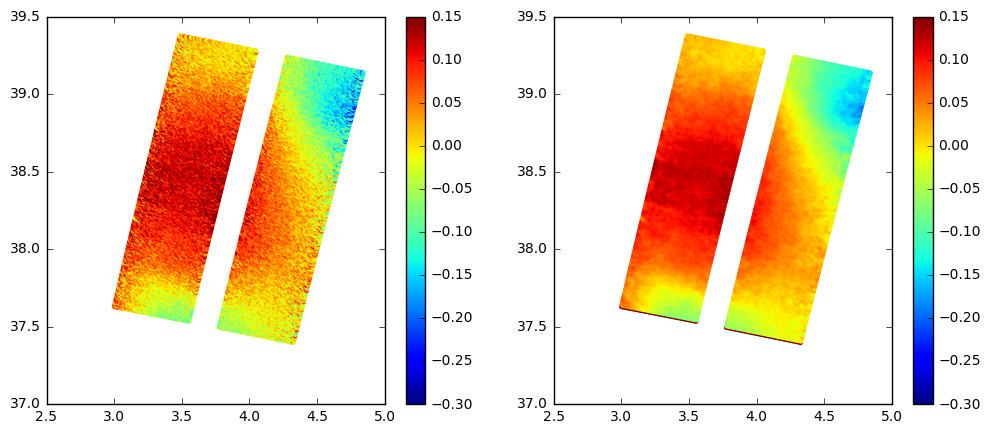

In [41]:
vmin = -0.3
vmax = 0.15

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
cs = plt.scatter(lon, lat, s=10, c=ssh, vmin=vmin, vmax=vmax, linewidth=0)
plt.colorbar(cs)
plt.subplot(1,2,2)
cs = plt.scatter(lon, lat, s=10, c=ssh_den, vmin=vmin, vmax=vmax, linewidth=0)
plt.colorbar(cs)
# pcolor interpolates gap for plotting

ssh had to be masked


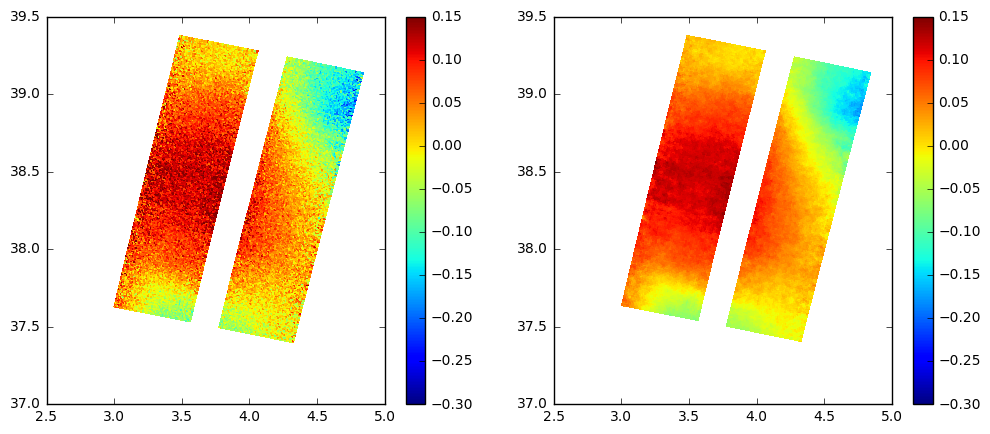

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
splot(ssh)
plt.subplot(1,2,2)
splot(ssh_den)

### For further check, read previously created file and plot SSH:

In [43]:
filename_den = '/Users/laura/PhD_private/data/SWOT_box_selections/v2/MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2_denoised.nc'


ssh had to be masked
ssh had to be masked


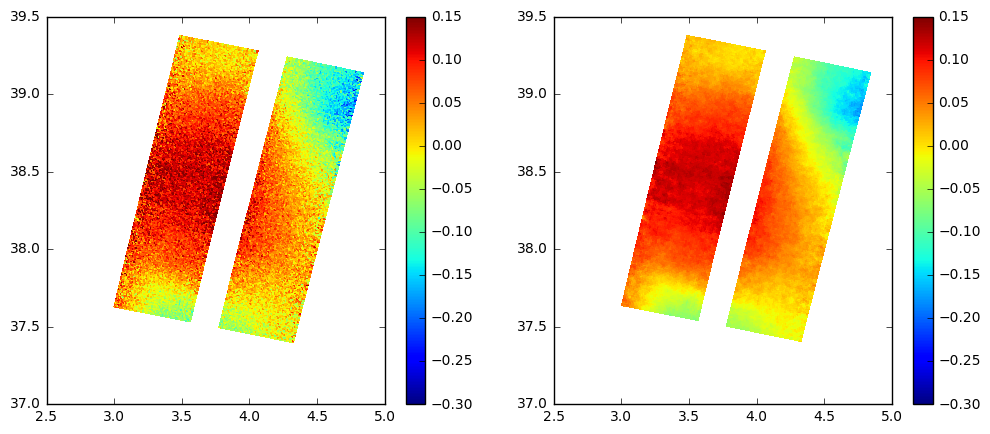

In [44]:
ssh_den2, lon, lat, x_ac, time = swotd.read_data(filename_den, 'SSH', 'lon', 'lat', 'x_ac', 'time')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
splot(ssh)
plt.subplot(1,2,2)
splot(ssh_den2)

# Now trying giving an output_filename instead of the dafault 'None':

In [45]:
outfiledir = '/Users/laura/PhD_private/data/SWOT_box_selections/denoised/test00/'
filename_den = outfiledir + 'MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2_denoised'   # created by the module

output_filename = filename_den

swotd.SWOTdenoise(filename, output_filename)

ssh had to be masked
Method: var_reg
Filtered field in  /Users/laura/PhD_private/data/SWOT_box_selections/denoised/test00/MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p009_v2_denoised


ssh had to be masked
ssh had to be masked


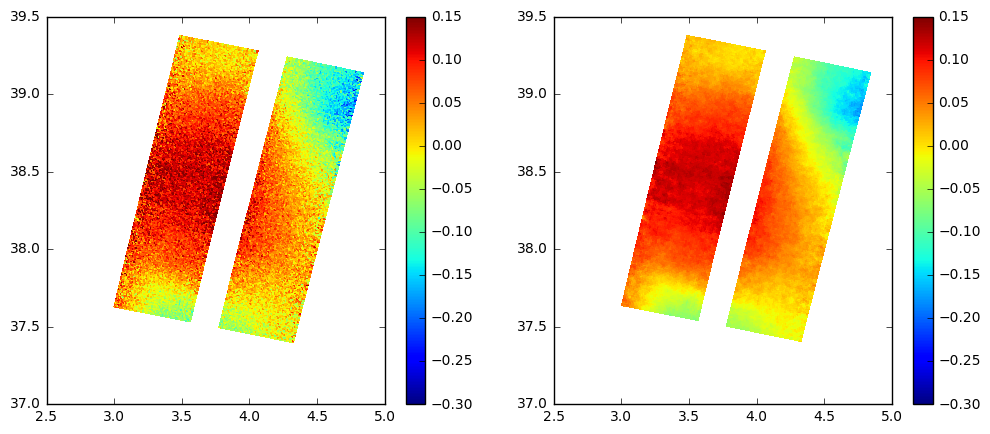

In [46]:
ssh_den2, lon, lat, x_ac, time = swotd.read_data(filename_den, 'SSH', 'lon', 'lat', 'x_ac', 'time')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
splot(ssh)
plt.subplot(1,2,2)
splot(ssh_den2)

## 2. Optional parameters

In addition to the arguments described above, the ```SWOTdenoise``` function takes 5 optional arguments:

- ```method```: ```gaussian```, ```boxcar```, or ```var_reg```;
- ```param```: number for ```gaussian``` and ```boxcar```; 3-entry tuple for ```var_reg```;
- ```itermax```: only for ```var_reg```: maximum number of iterations in the gradient descent algortihm;
- ```epsilon```: only for ```var_reg```: convergence criterium for the gradient descent algortihm;
- ```inpainting```: if ```True```, the nadir gap is inpainted. If ```False```, it is not and the returned SSH array is of the same shape as the original one. If the ```SWOTdenoise``` function is called using arrays (see above description) with ```inpainting=True```, then it returns SSH, lon, and lat arrays. If it is called using arrays with ```inpainting=False```, it returns only SSH, since lon and lat arrays are the same as for the input field.

Without the necessary arguments, denoising is performed using a default method with default parameter(s) identified to be optimal.

## 3. Examples 
Examples below are given using the second method to call the function: giving arrays as arguments. The arrays are first read in the input file using the ```read_data``` function.

In [47]:
ssh, lon, lat, x_ac, time = swotd.read_data(filename, 'ADT_obs_box', 'lon_box', 'lat_box', 'x_ac', 'x_al')


ssh had to be masked


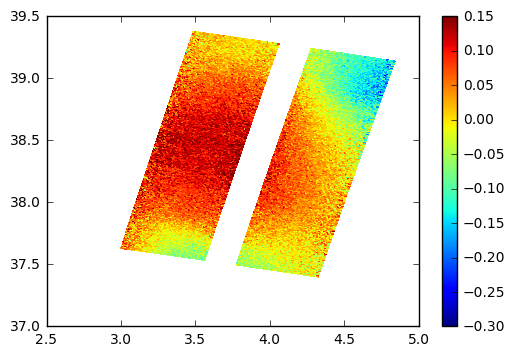

In [48]:
splot(ssh)

### Gaussian filter

ssh had to be masked
Method: gaussian


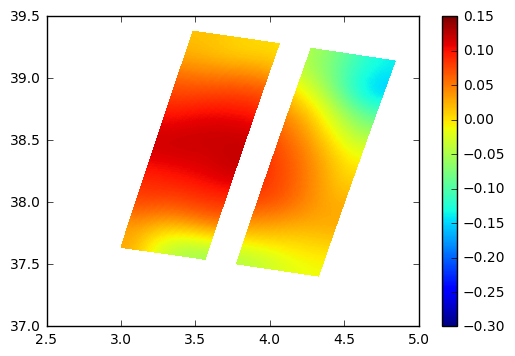

In [49]:
ssh_gau = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='gaussian', param=10.)
splot(ssh_gau)


### Boxcar filter:

ssh had to be masked
Method: boxcar


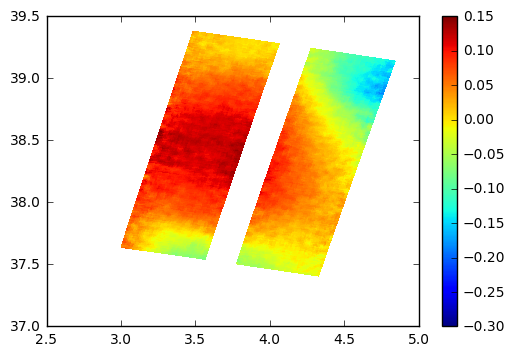

In [50]:
ssh_box = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='boxcar', param=4.)
splot(ssh_box)

### First order (gradients) regularization filter:

ssh had to be masked
Method: var_reg


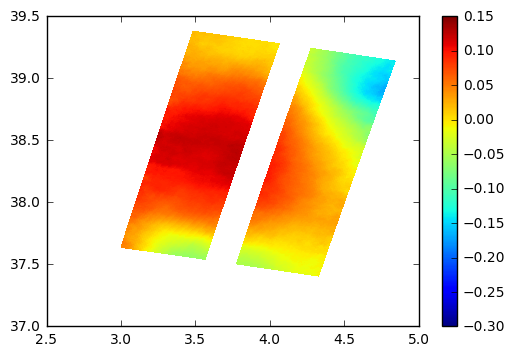

In [51]:
ssh_vr1 = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='var_reg', param=(10.,0,0) )
splot(ssh_vr1)

### Second order (laplacian) regularization filter:

ssh had to be masked
Method: var_reg


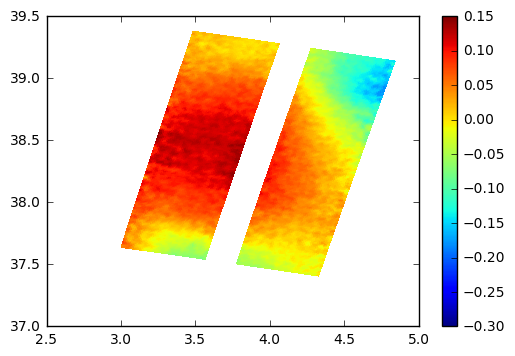

In [52]:
ssh_vr2 = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='var_reg', param=(0,1,0) )
splot(ssh_vr2)

### Third order (gradient of laplacian) regularization filter:

ssh had to be masked
Method: var_reg


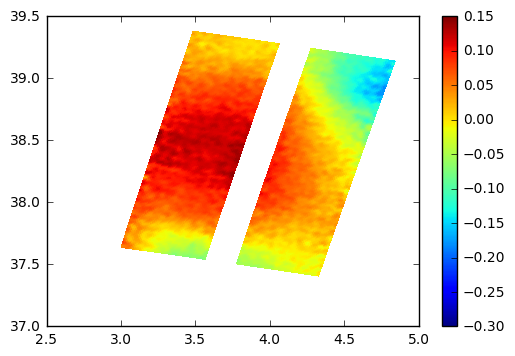

In [53]:
ssh_vr3 = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='var_reg', param=(0,0,1) )
splot(ssh_vr3)

### Combined orders regularization filter:

ssh had to be masked
Method: var_reg


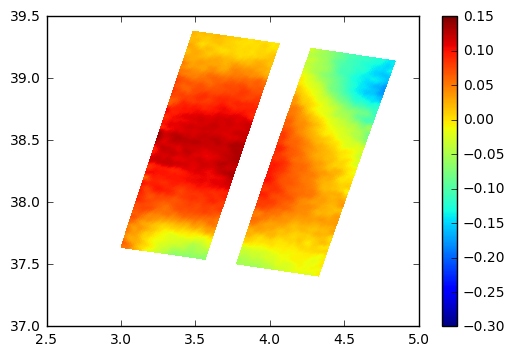

In [54]:
ssh_vr = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='var_reg', param=(1,2,4) )
splot(ssh_vr)

# 4. Inpainting
* If inpainting=True is set in the SWOTdenoise function, RectBivariateSpline interpolation done between the 2 half-swaths.  If convolution filter, gaussian else..

### Gaussian filter

ssh had to be masked
Method: gaussian


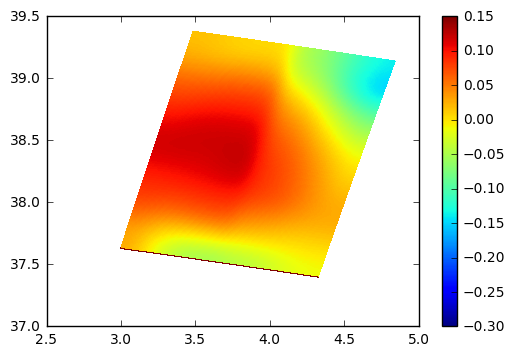

In [55]:
ssh_gau_inp, lon_f, lat_f = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='gaussian', param=10., inpainting=True)
cs = plt.pcolormesh(lon_f, lat_f, ssh_gau_inp, vmin=vmin, vmax=vmax)
plt.colorbar(cs)

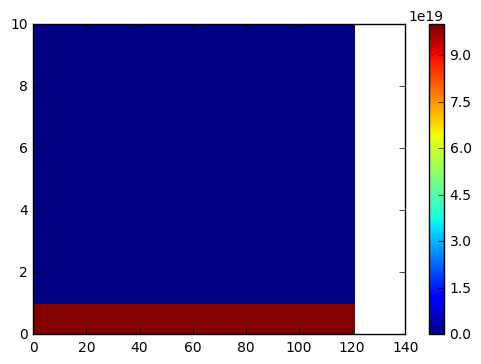

In [56]:
plt.pcolor(ssh_gau_inp[0:10,:]);plt.colorbar()

## --> weird at bottom

### Boxcar filter

ssh had to be masked
Method: boxcar


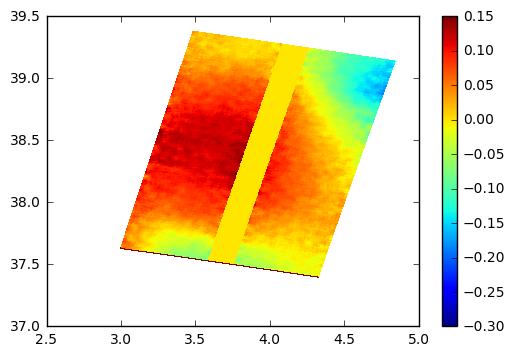

In [57]:
ssh_box_inp, _, _ = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='boxcar', param=4., inpainting=True)
cs=plt.pcolormesh(lon_f, lat_f, ssh_box_inp, vmin=vmin, vmax=vmax)
plt.colorbar(cs)

### Combined orders regularization filter

ssh had to be masked
Method: var_reg


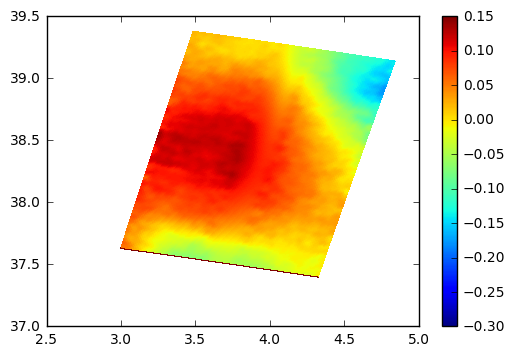

In [58]:
ssh_vr_inp, _, _ = swotd.SWOTdenoise(ssh=ssh, lon=lon, lat=lat, x_ac=x_ac, time=time, method='var_reg', param=(1,2,4), inpainting=True )
cs=plt.pcolormesh(lon_f, lat_f, ssh_vr_inp, vmin=vmin, vmax=vmax)
plt.colorbar(cs)

# 5. Test with a ascending SWOT pass

In [59]:
filename2 = filedir + 'MED_1km_nogap_JAS12_swotFastPhase_BOX_c90_p022_v2.nc'

ssh2, lon2, lat2, x_ac2, time2 = swotd.read_data(filename2, 'ADT_obs_box', 'lon_box', 'lat_box', 'x_ac', 'x_al')
lon2[lon2 > 180] -= 360 

In [60]:
ssh_den2 = swotd.SWOTdenoise(ssh=ssh2, lon=lon2, lat=lat2, x_ac=x_ac2, time=time2, method='var_reg', param=(4,2,1))

ssh had to be masked
Method: var_reg


In [61]:
ssh_f2, lon_f2, lat_f2, x_ac_f2 = swotd.fill_nadir_gap(ssh2, lon2, lat2, x_ac2, time2)

ssh_fden2, _, _, _ = swotd.fill_nadir_gap(ssh_den2, lon2, lat2, x_ac2, time2)

ssh had to be masked


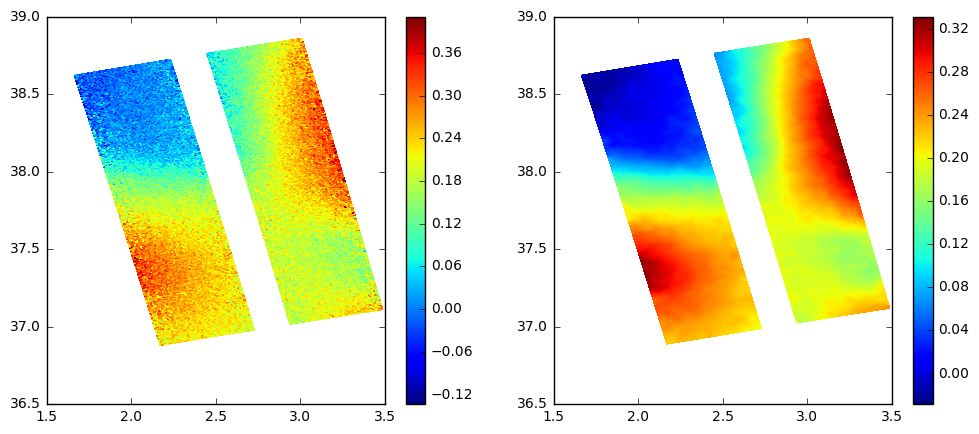

In [62]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
cs = plt.pcolormesh(lon_f2, lat_f2, ssh_f2)
plt.colorbar()#cs)

plt.subplot(1,2,2)
cs = plt.pcolormesh(lon_f2, lat_f2, ssh_fden2)
plt.colorbar(cs)